# Import Packages and Data

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
filepath = '../data/processed/cleaned_data.pkl'
data = pd.read_pickle(filepath)

In [3]:
data.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,27.0,0.00468,0.652,227360.0,0.941,0.79200,1,0.115,-5.201,1,0.0748,100.889,0.759,Electronic
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,5,0.124,-7.043,1,0.0300,115.002,0.531,Electronic
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,11,0.534,-4.617,0,0.0345,127.994,0.333,Electronic
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,4,0.157,-4.498,0,0.2390,128.014,0.270,Electronic
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,9,0.157,-6.266,0,0.0413,145.036,0.323,Electronic


In [4]:
data.shape

(50000, 14)

In [5]:
#bring back the encoders
with open('../encoders/key_encoder.pkl', 'rb') as handle:
    key_encoder = pickle.load(handle)
with open('../encoders/mode_encoder.pkl', 'rb') as handle:
    mode_encoder = pickle.load(handle)

# Explore the Data

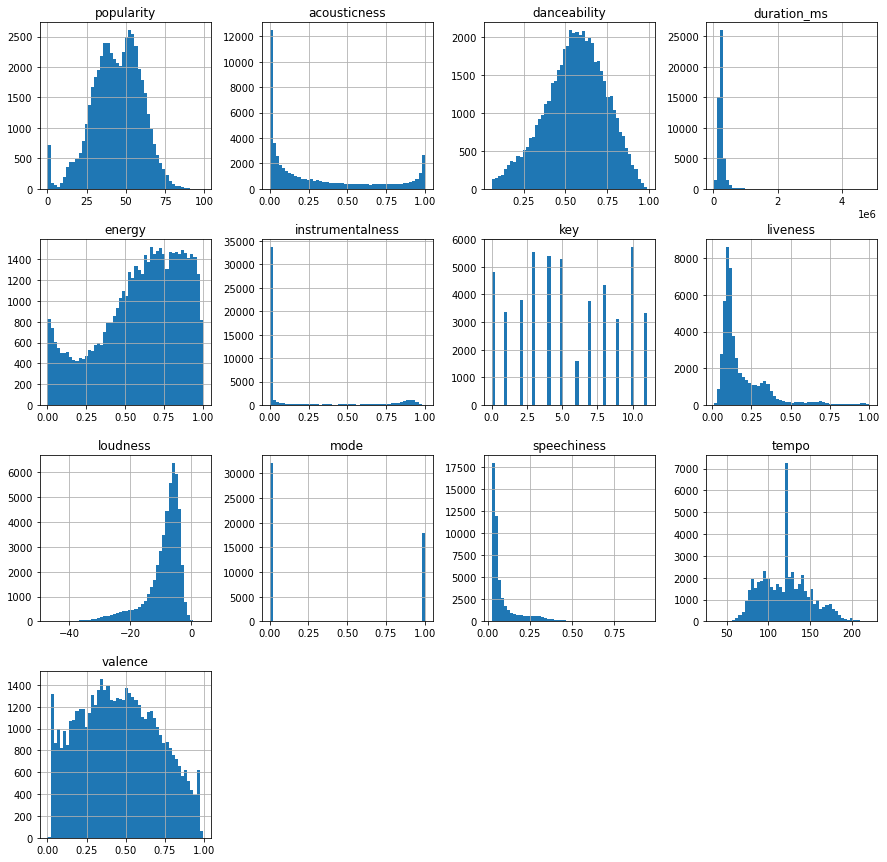

In [6]:
data.hist(figsize=(15, 15), bins=50)
plt.show()

Right off the bat, we see a gigantic peak around 120bpm for tempo, which was our imputed value, proving it may not have been the best choice in retrospect. Otherwise, according to [this](https://www.software.com/src/explore-the-data-behind-your-most-productive-music-for-coding), we can see most songs have vocal parts indicated by low score of instrumentalness, most musical rather than spoken work according to speechiness, and mostly studio recorded according to liveness.

These histograms allow a look at each column except for the genre column, so let's take a look at that.

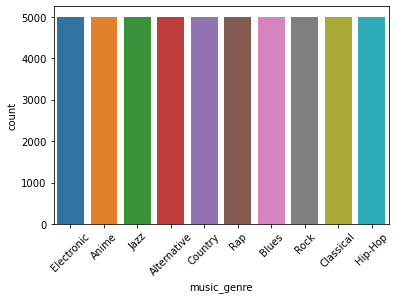

In [7]:
sns.countplot(x='music_genre', data=data)
plt.xticks(rotation = 45)
plt.show()

Nice, every genre is well represented. With this in hand, let's look at correlations between independent variables.

In [8]:
data.corr()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
popularity,1.000000,-0.290453,0.356420,-0.103452,0.216345,-0.364960,-0.005212,-0.039468,0.317941,0.013427,0.224309,0.031188,0.124913
acousticness,-0.290453,1.000000,-0.347681,0.077440,-0.791250,0.387970,0.005796,-0.109220,-0.730401,-0.025161,-0.163377,-0.220800,-0.270238
danceability,0.356420,-0.347681,1.000000,-0.188730,0.263934,-0.301277,-0.017777,-0.051465,0.390859,0.049634,0.279767,-0.014464,0.434557
duration_ms,-0.103452,0.077440,-0.188730,1.000000,-0.085376,0.158959,-0.002849,0.026290,-0.127287,0.012019,-0.101932,-0.041862,-0.163902
energy,0.216345,-0.791250,0.263934,-0.085376,1.000000,-0.389730,-0.001546,0.186731,0.838399,0.017878,0.158180,0.248436,0.396317
instrumentalness,-0.364960,0.387970,-0.301277,0.158959,-0.389730,1.000000,0.000263,-0.093537,-0.529030,0.060924,-0.199137,-0.120318,-0.272780
key,-0.005212,0.005796,-0.017777,-0.002849,-0.001546,0.000263,1.000000,-0.001112,-0.003095,-0.057697,-0.012535,-0.005294,-0.000466
liveness,-0.039468,-0.109220,-0.051465,0.026290,0.186731,-0.093537,-0.001112,1.000000,0.126504,-0.013550,0.114475,0.037671,0.052110
loudness,0.317941,-0.730401,0.390859,-0.127287,0.838399,-0.529030,-0.003095,0.126504,1.000000,0.008744,0.165578,0.226885,0.340664
mode,0.013427,-0.025161,0.049634,0.012019,0.017878,0.060924,-0.057697,-0.013550,0.008744,1.000000,0.077379,-0.018641,-0.025427


This would be easier with a visual.

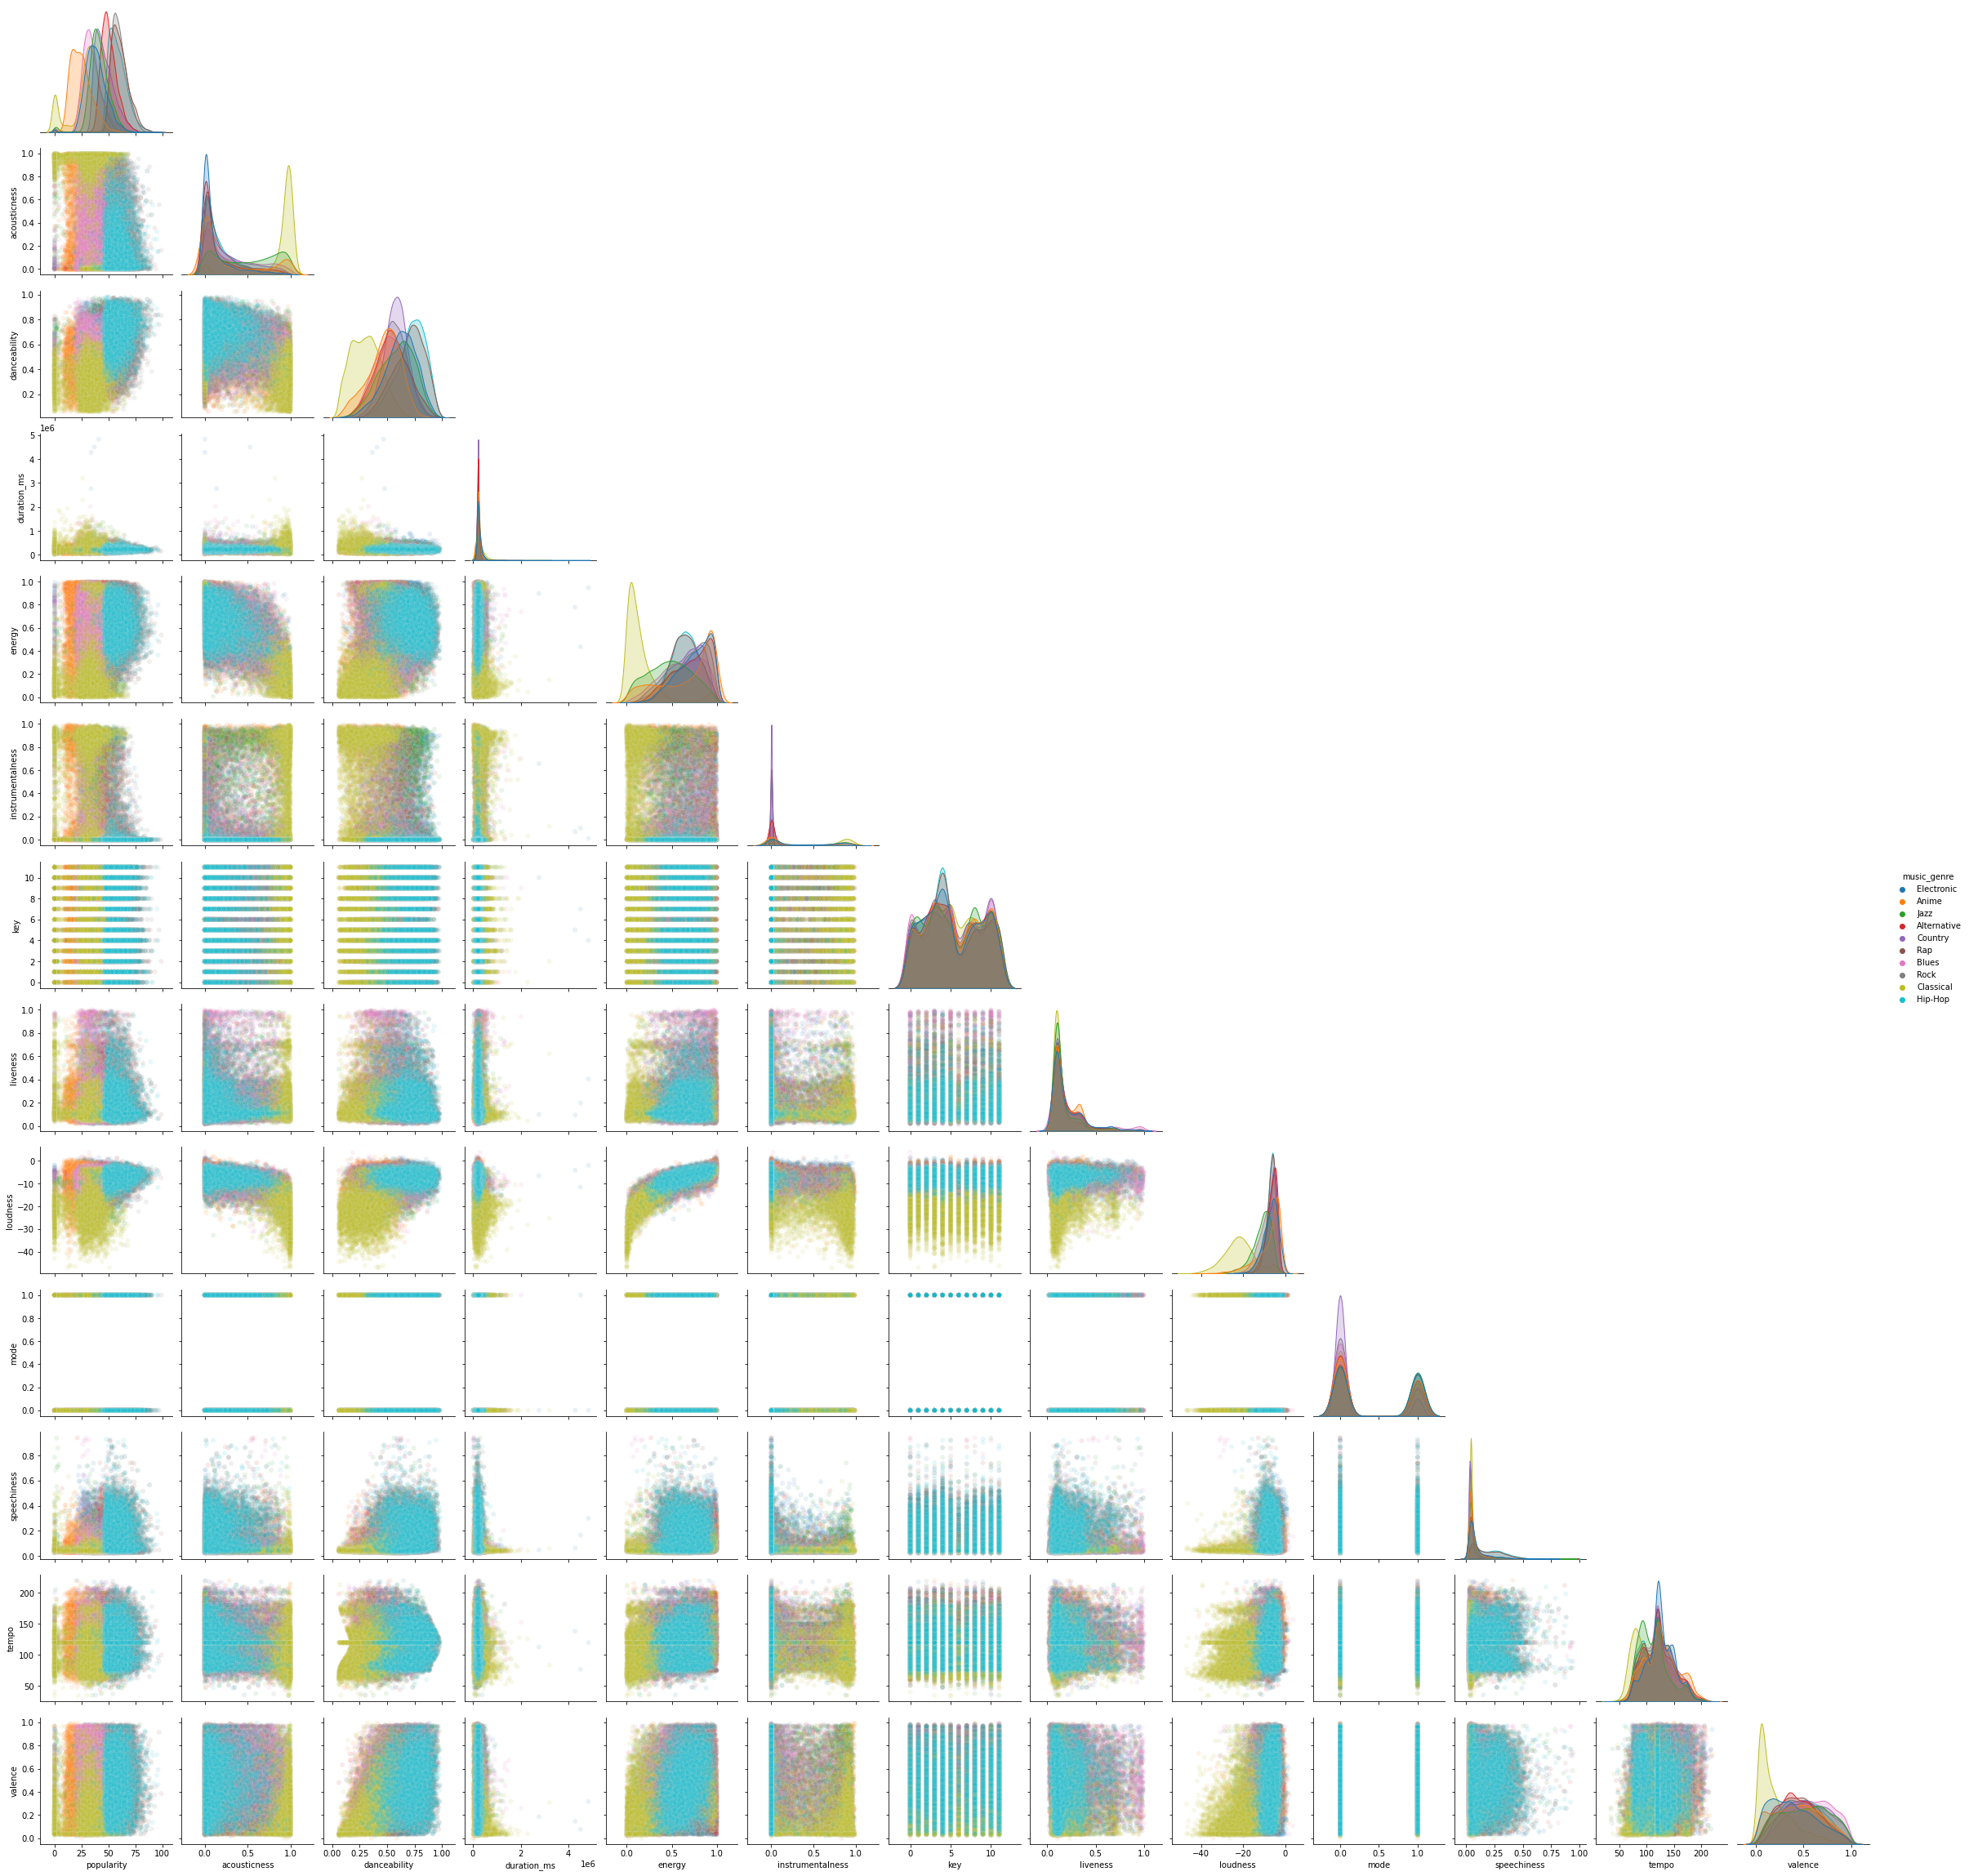

In [9]:
sns.pairplot(data, hue='music_genre', corner=True, plot_kws={'alpha':0.1})
plt.show()

And a heatmap.

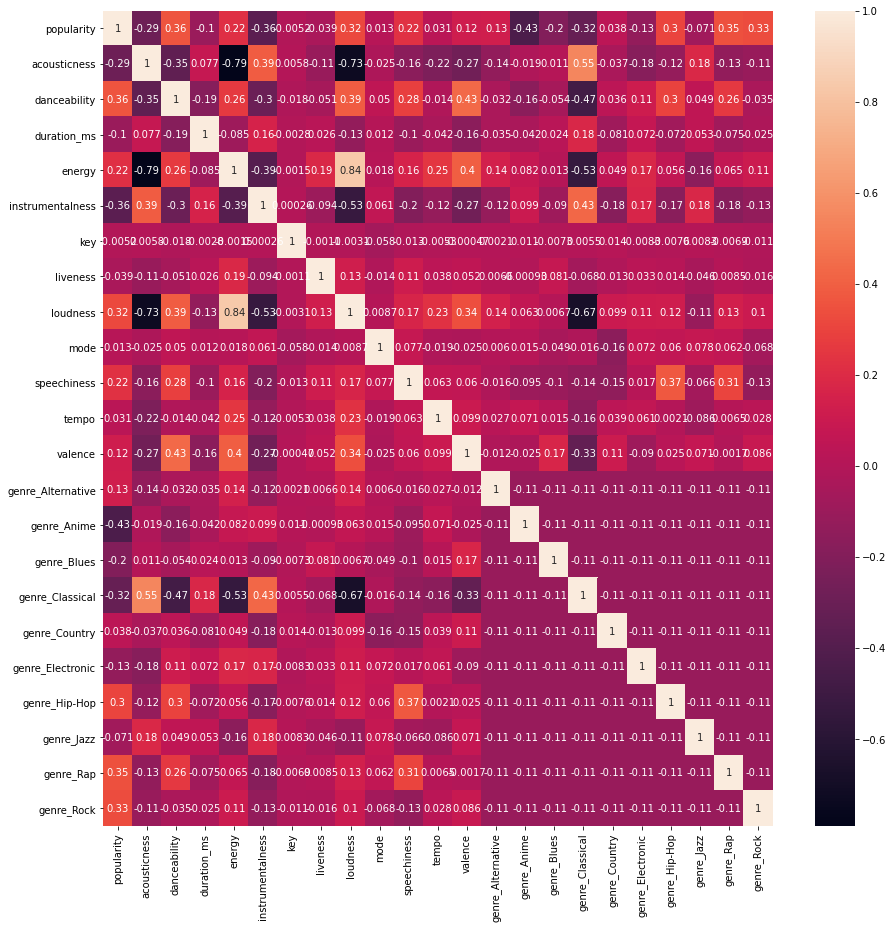

In [10]:
df_dummy = pd.get_dummies(data, prefix='genre', columns=['music_genre'])

fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(df_dummy.corr(), annot=True)
plt.show()

Interesting. There are some correlations: sounds with more energy and more instrumentalness are louder; accoustic songs are less loud, and also less energetic.

However, not of these relationship appears to support combining two columns into one for simpler fitting later on. At this point, we have a nice, clean dataset, and understanding of the meaning of each feature and roughly how they are distributed, and we're ready to model.